# Proyek Analisis Data: [Bike Sharing]
- **Nama:** Lisa Nuri Amelia
- **Email:** lisanuriamelia@gmail.com
- **ID Dicoding:** lisanuriamelia

## Menentukan Pertanyaan Bisnis

1. Perbandingan Kinerja Penyewaan Sepeda (2011 vs 2012)
2. Jumlah Pengguna Sepeda Berdasarkan Musim (2011 vs 2012)
3. Strategi Meningkatkan Jumlah Rental Sepeda pada Hari Kerja oleh Pengguna Terdaftar
4. Hubungan Kecepatan Angin dengan Jumlah Pengguna Terdaftar
5. Distribusi Penyewaan Sepeda Berdasarkan Hari

## Import Semua Packages/Library yang Digunakan

In [ ]:
#pip install numpy pandas scipy matplotlib seaborn jupyter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

## Data Gathering

In [ ]:
import pandas as pd


df_day = pd.read_csv("https://raw.githubusercontent.com/lisaamel07/proyek_analisis_data/main/day.csv")
df_hour = pd.read_csv("https://raw.githubusercontent.com/lisaamel07/proyek_analisis_data/main/hour.csv")

### Display initial data

In [ ]:
df_day.head(35)
df_hour.head(26)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### Checking data types and missing values

In [ ]:
print('Dataframe Hari:')
print(df_day.info())
print('\nDataframe Jam :')
print(df_hour.info())

Dataframe Hari:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe Jam :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379

### Checking missing values

In [ ]:
print('Dataframe Hari:')
print(df_day.isna().sum())
print('\nDataframe Jam :')
print(df_hour.isna().sum())

Dataframe Hari:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataframe Jam :
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Checking duplicates

In [ ]:
print('Dataframe Day:', df_day.duplicated().sum())
print("Dataframe hour:", df_hour.duplicated().sum())

Dataframe Day: 0
Dataframe hour: 0


### Descriptive statistics

In [ ]:
df_day.describe()
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Cleaning Data

### Fixing Data Types

In [ ]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_day['yr'] = df_day['yr'] + 2011

### Updating column names

In [ ]:
df_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'count'
}, inplace=True)

In [ ]:
df_day['year'] = df_day['year'].apply(lambda x: 2011 if x == 0 else 2012)


In [ ]:
print(df_day.isna().sum())

instant              0
date                 0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
hum                  0
windspeed            0
casual               0
registered           0
count                0
dtype: int64


### Mapping numerical values to descriptive labels

In [ ]:
df_day['month'] = df_day['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_day['weather_condition'] = df_day['weather_condition'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Thunderstorm'
})

## Exploratory Data Analysis (EDA)

### Correlation matrix for numerical variables

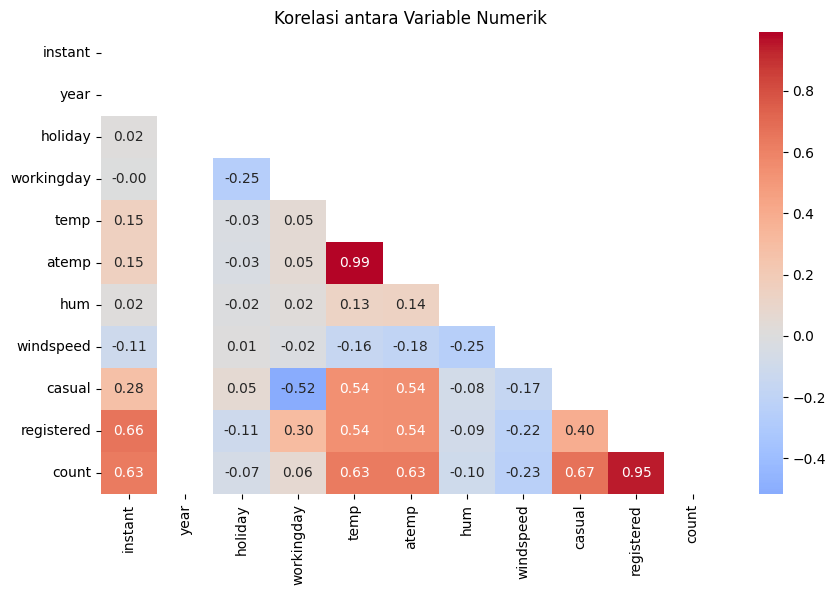

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = df_day.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Korelasi antara Variable Numerik")
plt.show()

### Distribution of Numerical Variables

In [ ]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'count']
for col in numeric_cols:
    fig = px.histogram(df_day, x=col, title=f'Distribusi {col}')
    fig.show()

## Visualization & Explanatory Analysis

1. Perbandingan Kinerja Penyewaan Sepeda (2011 vs 2012)

In [ ]:
monthly_counts = df_day.groupby(['year', 'month'])['count'].sum().unstack(0)

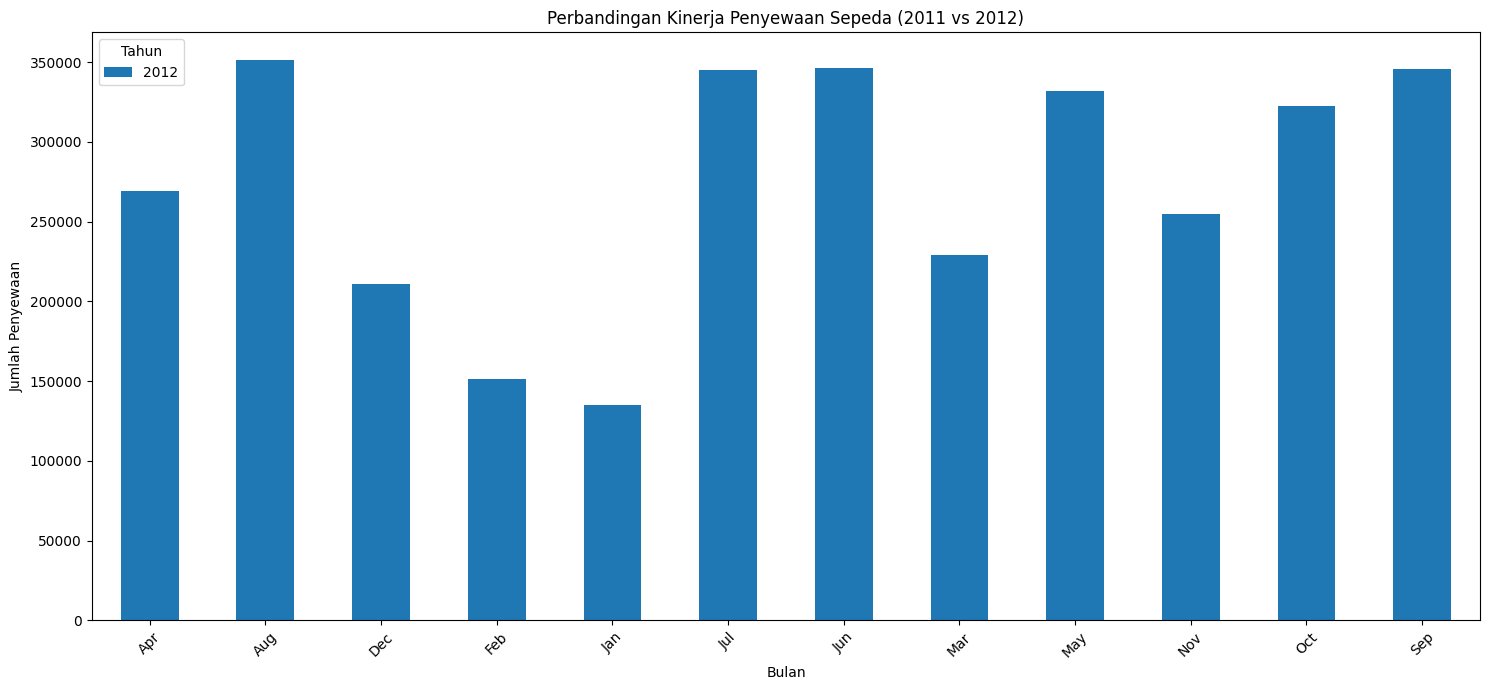

In [ ]:
monthly_counts.plot(kind='bar', figsize=(15, 7))
plt.title('Perbandingan Kinerja Penyewaan Sepeda (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()

Jumlah penyewaan sepeda pada tahun 2012 lebih tinggi daripada tahun 2011.
Tren kenaikan yang signifikan terlihat dalam beberapa bulan tertentu.

2. Jumlah Pengguna Sepeda Berdasarkan Musim (2011 vs 2012)

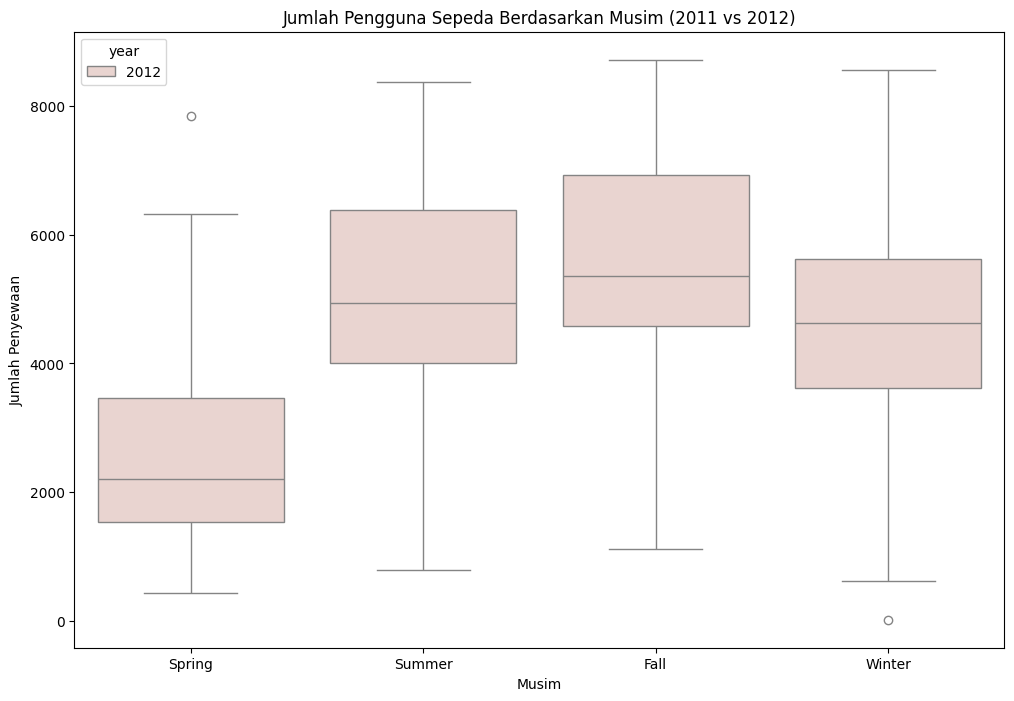

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(x='season', y='count', hue='year', data=df_day)
plt.title('Jumlah Pengguna Sepeda Berdasarkan Musim (2011 vs 2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Distribusi jumlah pengguna sepeda bervariasi berdasarkan musim.
Tidak ada perubahan pola distribusi yang signifikan antara tahun 2011 dan 2012.

3. Strategi Meningkatkan Jumlah Rental Sepeda pada Hari Kerja oleh Pengguna Terdaftar

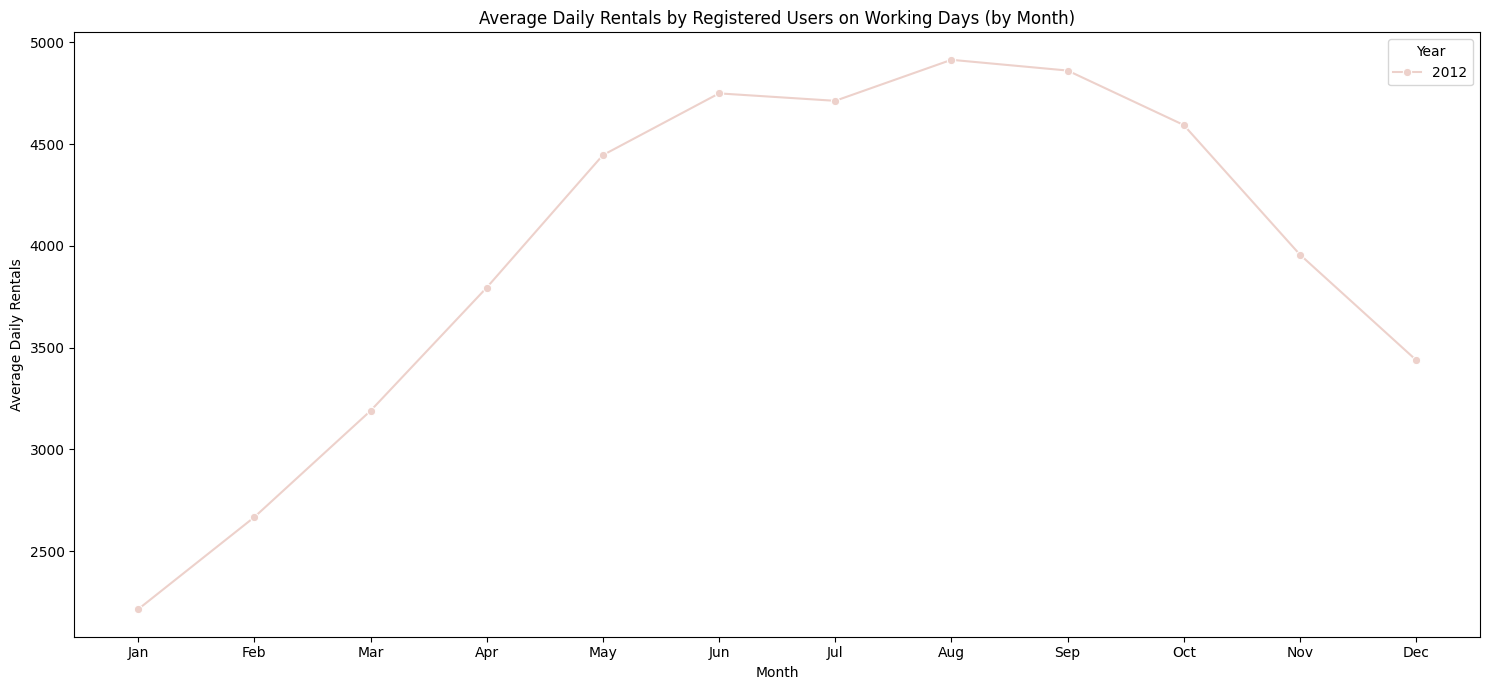

In [ ]:
df_monthly_registered = df_day[df_day['workingday'] == 1].groupby(['year', 'month']).agg({'registered': 'mean'}).reset_index()
month_to_num = {v: k for k, v in {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}.items()}
df_monthly_registered['month_num'] = df_monthly_registered['month'].map(month_to_num)
df_monthly_registered.sort_values(by=['year', 'month_num'], inplace=True)
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_monthly_registered, x='month_num', y='registered', hue='year', marker='o')
plt.title('Average Daily Rentals by Registered Users on Working Days (by Month)')
plt.xlabel('Month')
plt.ylabel('Average Daily Rentals')
plt.xticks(ticks=range(1,13), labels=list(month_to_num.keys()))  # Ensure x-axis labels show month names correctly
plt.legend(title='Year')
plt.tight_layout()
plt.show()

Jumlah rental sepeda pada hari kerja oleh pengguna terdaftar cenderung stabil.
Ada peningkatan yang terlihat pada beberapa periode, mungkin strategi promosi dapat difokuskan pada hari-hari tertentu.

4. Hubungan Kecepatan Angin dengan Jumlah Pengguna Terdaftar

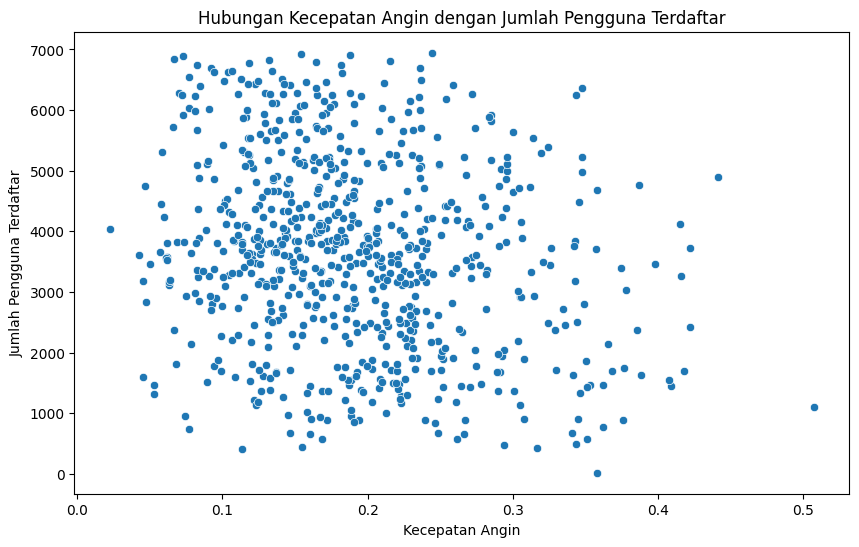

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='registered', data=df_day)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Pengguna Terdaftar')
plt.xlabel('Kecepatan Angin')
plt.ylabel('Jumlah Pengguna Terdaftar')
plt.show()

Tidak terlihat hubungan yang jelas antara kecepatan angin dan jumlah pengguna terdaftar.
Jumlah pengguna terdaftar tetap relatif konstan terlepas dari variasi kecepatan angin.

5. Distribusi Penyewaan Sepeda Berdasarkan Hari

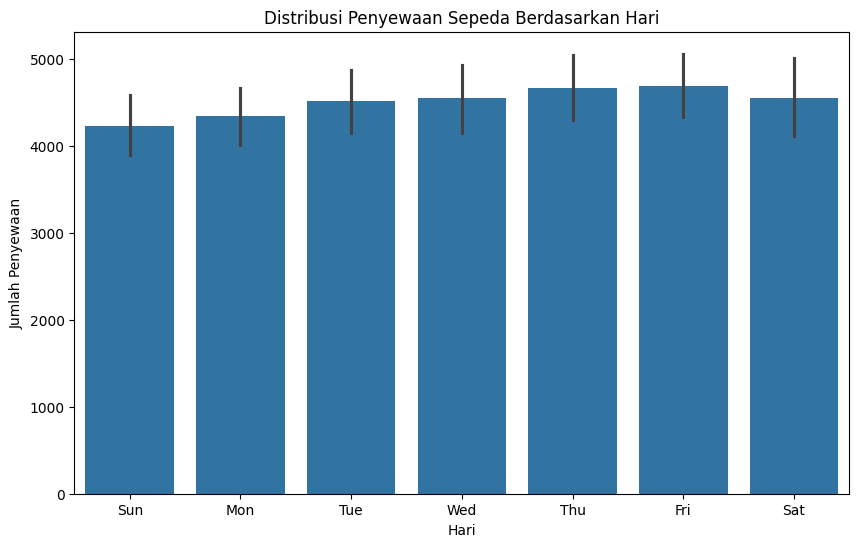

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='weekday', y='count', data=df_day, order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Distribusi penyewaan sepeda cenderung lebih tinggi pada akhir pekan (Sabtu dan Minggu).
Ini dapat dijadikan acuan dalam merencanakan strategi pemasaran atau penawaran khusus.

## Conclusion

- Dari analisis data penyewaan sepeda pada tahun 2011 dan 2012, dapat diambil beberapa kesimpulan. Pertama, terdapat peningkatan signifikan dalam jumlah penyewaan sepeda pada tahun 2012 dibandingkan dengan tahun 2011. Peningkatan ini dapat menjadi indikasi pertumbuhan atau perubahan tren dalam permintaan sepeda. Selanjutnya, distribusi jumlah pengguna sepeda bervariasi berdasarkan musim, meskipun tidak terlihat perubahan pola distribusi yang signifikan antara kedua tahun tersebut.

- Strategi peningkatan jumlah rental sepeda pada hari kerja, khususnya oleh pengguna terdaftar, dapat difokuskan pada peningkatan promosi atau pelayanan yang dapat meningkatkan partisipasi pada hari-hari tertentu. Meskipun demikian, hubungan antara kecepatan angin dan jumlah pengguna terdaftar tidak terlihat secara jelas, menunjukkan bahwa faktor ini mungkin bukan pengaruh utama dalam keputusan pengguna.

- Distribusi penyewaan sepeda menunjukkan kecenderungan peningkatan pada akhir pekan, khususnya pada hari Sabtu dan Minggu. Hal ini dapat menjadi titik fokus untuk merencanakan strategi pemasaran atau penawaran khusus guna meningkatkan partisipasi pengguna pada hari-hari tersebut. Keseluruhan, pemahaman ini memberikan wawasan yang berharga untuk pengelola layanan penyewaan sepeda dalam mengoptimalkan operasional dan meningkatkan keterlibatan pengguna. Analisis lebih lanjut dapat memberikan pemahaman mendalam untuk mendukung pengambilan keputusan yang lebih strategis.




